In [11]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
from PIL import Image
import os
from plot_utils import multiplot
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from Strip2DFFT import doFilterFFT, do2DFFT, do2DInverseFFT, CrossCorrelation, CrossCorrelationStrip

In [12]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/CrossCorrelation/'
sourceimageA = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/KymographN5Circle.tif'
sourceimageB = '/Users/aimachine/Documents/KymoGraphsForFFT/NewKymographs/KymographN5Circle.tif'

SaveFileName = "Curvature-Curvature";

base = os.path.split(sourceimageA)[-1]

Filename = os.path.splitext(base)
axes = 'YX'

In [13]:
imageA = imread(sourceimageA)
imageB = imread(sourceimageB)



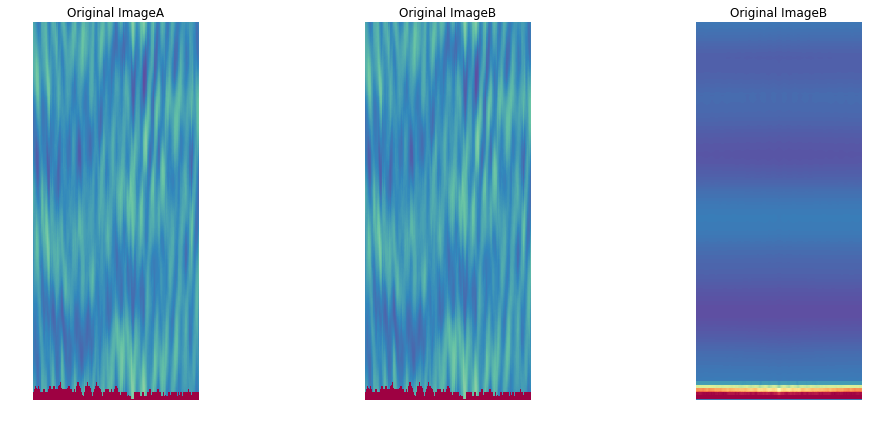

In [14]:
crosscorrelation = CrossCorrelation(imageA, imageB)
min = 0
max = 255
crosscorrelation = normalizeMinMax(crosscorrelation, min, max)
multiplot(imageA, imageB, crosscorrelation, "Original ImageA", "Original ImageB", "Cross Correlation")



In [15]:
save_tiff_imagej_compatible((targetdir + SaveFileName +os.path.basename(Filename[0])+os.path.basename(Filename[1])) , crosscorrelation, axes)